In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-01 18:58:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 173.194.196.207, 173.194.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  90.3MB/s    in 5.3s    

2024-01-01 18:58:36 (93.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath, dirnames, filenames in  os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in  data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)
[[[ 40  15  10]
  [ 43  18  13]
  [ 49  22  15]
  ...
  [  5   7   4]
  [  5   7   2]
  [  7   9   4]]

 [[ 39  14   9]
  [ 41  16  11]
  [ 46  19  12]
  ...
  [  6   8   5]
  [  7   9   4]
  [  9  11   6]]

 [[ 36  13   7]
  [ 37  14   8]
  [ 41  16  11]
  ...
  [  8   8   6]
  [  8  10   5]
  [ 10  12   7]]

 ...

 [[103 102 110]
  [114 113 121]
  [118 116 127]
  ...
  [ 42  28  25]
  [ 41  27  24]
  [ 40  26  23]]

 [[117 116 124]
  [131 130 138]
  [110 109 117]
  ...
  [ 44  30  27]
  [ 41  27  24]
  [ 39  25  22]]

 [[115 114 122]
  [122 121 129]
  [190 189 197]
  ...
  [ 44  30  27]
  [ 40  26  23]
  [ 37  23  20]]]


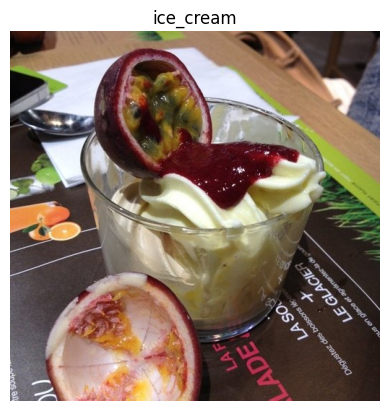

In [6]:
image = view_random_image(train_dir, random.choice(class_names))
print(image)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )




Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
import tensorflow as tf
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])


model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [9]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 632s 3s/step - loss: 2.1970 - accuracy: 0.1803 - val_loss: 1.9911 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 614s 3s/step - loss: 1.9728 - accuracy: 0.3049 - val_loss: 1.9675 - val_accuracy: 0.2764
Epoch 3/5
235/235 [==============================] - 604s 3s/step - loss: 1.7736 - accuracy: 0.3957 - val_loss: 1.8872 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 601s 3s/step - loss: 1.3212 - accuracy: 0.5593 - val_loss: 2.0576 - val_accuracy: 0.3284
Epoch 5/5
235/235 [==============================] - 573s 2s/step - loss: 0.7240 - accuracy: 0.7721 - val_loss: 2.8103 - val_accuracy: 0.2932


In [10]:
model.evaluate(test_data)

79/79 [==============================] - 57s 710ms/step - loss: 2.8103 - accuracy: 0.2932


[2.810347080230713, 0.29319998621940613]

In [ ]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


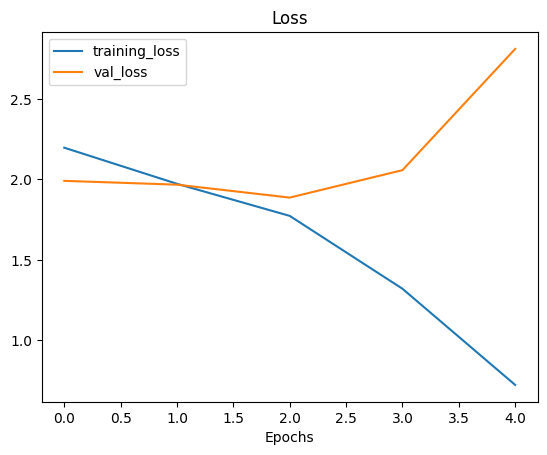

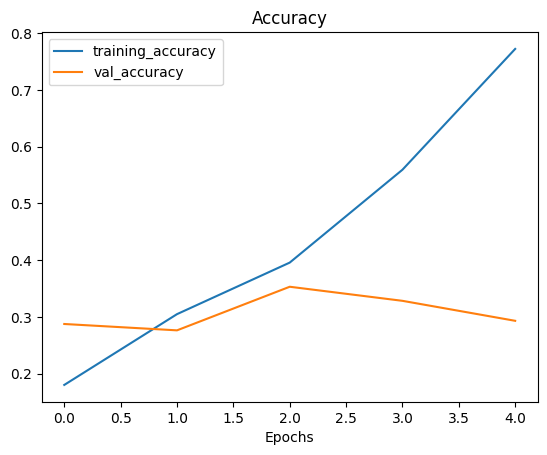

In [12]:
plot_loss_curve(history)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
model.save('/content/model/10_class_model_overfit')

In [15]:
model.save('10_class_model_overfit.h5')

In [16]:
!zip -r /content/10_class_model_overfit.zip /content/model/10_class_model_overfit

  adding: content/model/10_class_model_overfit/ (stored 0%)
  adding: content/model/10_class_model_overfit/keras_metadata.pb (deflated 91%)
  adding: content/model/10_class_model_overfit/saved_model.pb (deflated 88%)
  adding: content/model/10_class_model_overfit/assets/ (stored 0%)
  adding: content/model/10_class_model_overfit/variables/ (stored 0%)
  adding: content/model/10_class_model_overfit/variables/variables.index (deflated 65%)
  adding: content/model/10_class_model_overfit/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model/10_class_model_overfit/fingerprint.pb (stored 0%)
